In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1: data (prepare and load)

2: build model

3: fitting the model to data (training)

4: making predictions and evaluate a model (inference)

5: saving and loading a model

6: putting all together

1. Data

In [3]:
weight = 0.7
bias  = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
split = int(len(x)*0.8)

In [5]:
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

In [6]:
def plot_predictions(train_data = x_train, 
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Test data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
    
    plt.legend(prop={"size": 14})

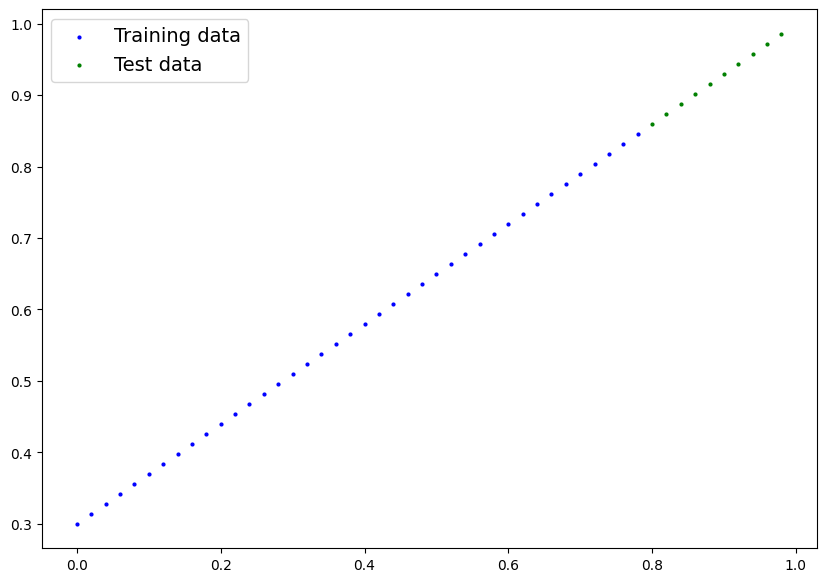

In [7]:
plot_predictions()

main alg: gradient descent, backpropagation

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad= True, dtype = torch.float))
        #keep track of the grad parameters
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias #linear regression

In [9]:
model_0 = LinearRegressionModel()

In [10]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8077])), ('bias', tensor([0.6369]))])

In [11]:
with torch.inference_mode():
    y_pred = model_0(x_test)
y_test, y_pred

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[1.2831],
         [1.2993],
         [1.3154],
         [1.3316],
         [1.3477],
         [1.3639],
         [1.3800],
         [1.3962],
         [1.4123],
         [1.4285]]))

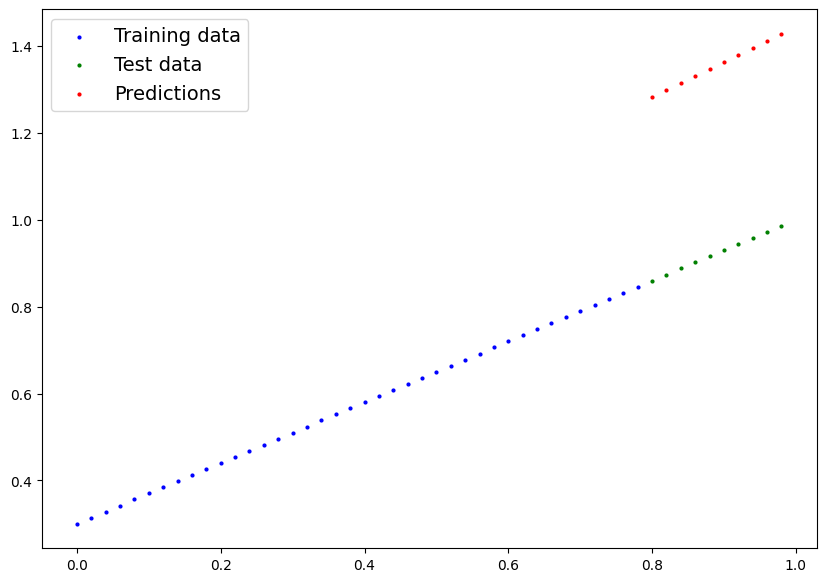

In [12]:
plot_predictions(predictions = y_pred)

loss and optimizer

In [13]:
model_0.parameters()

<generator object Module.parameters at 0x000002D2E5579FC0>

In [14]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

loop

0. loop the data and do...
1. foward pass (data in foward())
2. calculate the loss
3. optimizer zero grad (it acumulates between interations)
4. loss backwards (move backwards to calculate gradients) (**backpropagation**)
5. optimizer step (**gradiant descent**)

In [15]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

#0
for epoch in range(epochs):
    model_0.train() #sets all params that require gradients to require gradients
    
    #1
    y_pred = model_0(x_train)
    
    #2
    loss = loss_fn(y_pred, y_train)
    
    #3
    optimizer.zero_grad() #zero gradient
    
    #4
    loss.backward() #calc grad
    
    #5
    optimizer.step() #go next step
    
    model_0.eval() #turns off gradient tracking (not needed to validation)
    
    with torch.inference_mode():
        test_pred = model_0(x_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())
        print("--//--")
    


Epoch: 0 | Loss: 0.37895363569259644 | Test loss: 0.41933903098106384
OrderedDict([('weight', tensor([0.8038])), ('bias', tensor([0.6269]))])
--//--
Epoch: 10 | Loss: 0.2637437582015991 | Test loss: 0.284629225730896
OrderedDict([('weight', tensor([0.7648])), ('bias', tensor([0.5269]))])
--//--
Epoch: 20 | Loss: 0.1485338658094406 | Test loss: 0.14991939067840576
OrderedDict([('weight', tensor([0.7258])), ('bias', tensor([0.4269]))])
--//--
Epoch: 30 | Loss: 0.03332400321960449 | Test loss: 0.015209567733108997
OrderedDict([('weight', tensor([0.6868])), ('bias', tensor([0.3269]))])
--//--
Epoch: 40 | Loss: 0.0021197504829615355 | Test loss: 0.008347672410309315
OrderedDict([('weight', tensor([0.6912])), ('bias', tensor([0.2994]))])
--//--
Epoch: 50 | Loss: 0.007551747374236584 | Test loss: 0.008347672410309315
OrderedDict([('weight', tensor([0.6912])), ('bias', tensor([0.2994]))])
--//--
Epoch: 60 | Loss: 0.007551747374236584 | Test loss: 0.008347672410309315
OrderedDict([('weight', te

In [16]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.3094]))])

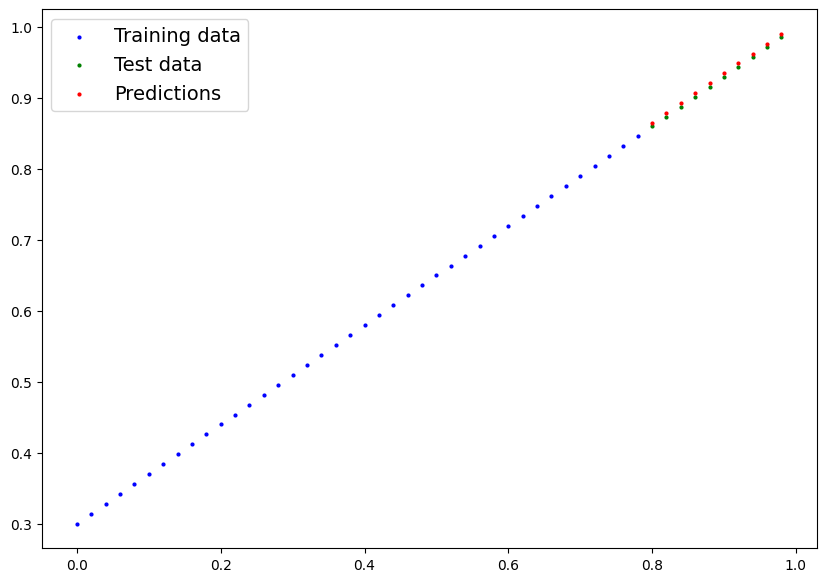

In [17]:
with torch.inference_mode():
    y_pred = model_0(x_test)
plot_predictions(predictions = y_pred)

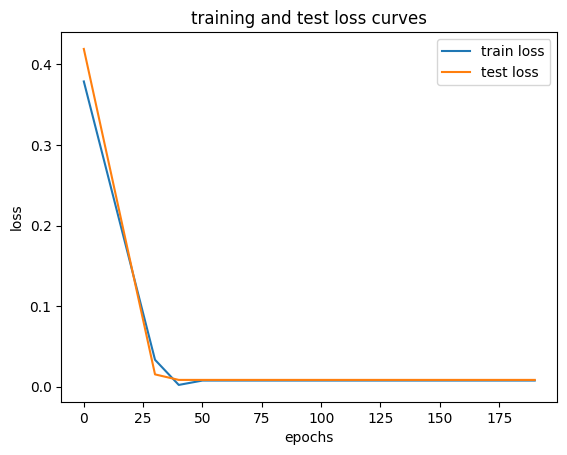

In [18]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

save and load

1. **torch.save()** - save in pickle format
2. **torch.load()** - load pytorch object
3. **torch.nn.Module.load_state_dict()** - save parameters

this model, for example can find the **a** and **b** of an **ax + b** function (fake im dumb, it will find with this a and b too)

the parameters are to save THIS **a** and **b** function that was calculated (to load in another instance of this model)

7:27:00